# Introduction
Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

<font color = 'blue'>
Content:
    
1. [Load and Check Data](#1)
1. [Variable Description](#2)
1. [Outlier Detection](#3)
1. [Missing Value](#4)
1. [Visualization](#5)
1. [Label Encoder](#6)
1. [Drop ID and Dt_Customer](#7)
1. [Modeling](#8)  
1. [Train - Test - Split](#9)
1. [Hyperparameter Tuning -- Grid Search -- Cross Validation](#10)    

<a id = "1"></a><b>
## Load and Check Data

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings("ignore")

import os

In [2]:
data = pd.read_csv("marketing_campaign.csv", sep = "\t")
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [3]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [4]:
data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


<a id = "2"></a><b>
## Variable Description
Attributes
* People
    * ID: Customer's unique identifier
    * Year_Birth: Customer's birth year
    * Education: Customer's education level
    * Marital_Status: Customer's marital status
    * Income: Customer's yearly household income
    * Kidhome: Number of children in customer's household
    * Teenhome: Number of teenagers in customer's household
    * Dt_Customer: Date of customer's enrollment with the company
    * Recency: Number of days since customer's last purchase
    * Complain: 1 if the customer complained in the last 2 years, 0 otherwise
* Products
    * MntWines: Amount spent on wine in last 2 years
    * MntFruits: Amount spent on fruits in last 2 years
    * MntMeatProducts: Amount spent on meat in last 2 years
    * MntFishProducts: Amount spent on fish in last 2 years
    * MntSweetProducts: Amount spent on sweets in last 2 years
    * MntGoldProds: Amount spent on gold in last 2 years
* Promotion
    * NumDealsPurchases: Number of purchases made with a discount
    * AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
    * AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
    * AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
    * AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
    * AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
    * Response: 1 if customer accepted the offer in the last campaign, 0 otherwise
* Place
    * NumWebPurchases: Number of purchases made through the company’s website
    * NumCatalogPurchases: Number of purchases made using a catalogue
    * NumStorePurchases: Number of purchases made directly in stores
    * NumWebVisitsMonth: Number of visits to company’s website in the last month
* Target
    * Need to perform clustering to summarize customer segments.


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

* int: ID, Year_Birth, Kidhome, Teenhome, Recency, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumStorePurchases, NumWebVisitsMonth, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, AcceptedCmp1, AcceptedCmp2, Complain, Z_CostContact, Z_Revenue, Response 
* object: Education, Marital_Status, Dt_Customer
* float: Income

<a id = "3"></a><b>
## Outlier Detection

In [6]:
def detect_outliers(df,features):
    outlier_indices = []
    
    for c in features:
        # 1st quartile
        Q1 = np.percentile(df[c],25)
        
        # 3rd quartile
        Q3 = np.percentile(df[c],75)
        
        # IQR
        IQR = Q3 - Q1
        
        # Outlier step
        outlier_step = IQR * 1.5
        
        # detect outlier and their indeces
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        
        # store indeces
        outlier_indices.extend(outlier_list_col)
    
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)
    
    return multiple_outliers

In [7]:
data.loc[detect_outliers(data,["Income", "Recency","MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"])]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
987,4580,1969,Graduation,Married,75759.0,0,0,25-10-2013,46,1394,...,5,1,0,1,1,0,0,3,11,1
1010,5236,1979,Graduation,Together,77568.0,0,1,25-08-2012,30,1230,...,5,0,1,1,1,0,0,3,11,0
1052,4475,1949,PhD,Married,69098.0,0,0,16-02-2013,82,1315,...,5,0,0,0,0,0,0,3,11,0
1458,10133,1970,Graduation,Single,93790.0,0,0,12-02-2014,16,1302,...,2,0,1,1,1,0,0,3,11,1
1492,1763,1988,Graduation,Together,87679.0,0,0,27-07-2013,62,1259,...,4,1,0,1,1,0,0,3,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1729,3828,1951,Graduation,Married,71107.0,0,1,17-02-2013,61,533,...,4,0,0,0,0,0,0,3,11,0
1788,1513,1979,2n Cycle,Together,60839.0,1,1,28-08-2012,72,600,...,8,0,0,0,0,0,0,3,11,0
1814,10177,1954,Graduation,Divorced,72071.0,0,1,14-02-2013,4,531,...,2,0,0,0,0,0,0,3,11,0
2166,2429,1954,Graduation,Divorced,72071.0,0,1,14-02-2013,4,531,...,2,0,0,0,0,0,0,3,11,0


In [8]:
data = data.drop(detect_outliers(data,["Income", "Recency","MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"]),axis = 0).reset_index(drop = True)

In [9]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
1,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
2,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
3,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
4,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,...,6,0,0,0,0,0,0,3,11,0


<a id = "4"></a><b>
## Missing Value

In [10]:
data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 23
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [11]:
income_null = data[data["Income"].isnull()]

In [12]:
income_null

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
9,1994,1983,Graduation,Married,NaN,1,0,15-11-2013,11,5,...,7,0,0,0,0,0,0,3,11,0
26,5255,1986,Graduation,Single,NaN,1,0,20-02-2013,19,5,...,1,0,0,0,0,0,0,3,11,0
42,7281,1959,PhD,Single,NaN,0,0,05-11-2013,80,81,...,2,0,0,0,0,0,0,3,11,0
46,7244,1951,Graduation,Single,NaN,2,1,01-01-2014,96,48,...,6,0,0,0,0,0,0,3,11,0
54,8557,1982,Graduation,Single,NaN,1,0,17-06-2013,57,11,...,6,0,0,0,0,0,0,3,11,0
67,10629,1973,2n Cycle,Married,NaN,1,0,14-09-2012,25,25,...,8,0,0,0,0,0,0,3,11,0
84,8996,1957,PhD,Married,NaN,2,1,19-11-2012,4,230,...,9,0,0,0,0,0,0,3,11,0
85,9235,1957,Graduation,Single,NaN,1,1,27-05-2014,45,7,...,7,0,0,0,0,0,0,3,11,0
86,5798,1973,Master,Together,NaN,0,0,23-11-2013,87,445,...,1,0,0,0,0,0,0,3,11,0
118,8268,1961,PhD,Married,NaN,0,1,11-07-2013,23,352,...,6,0,0,0,0,0,0,3,11,0


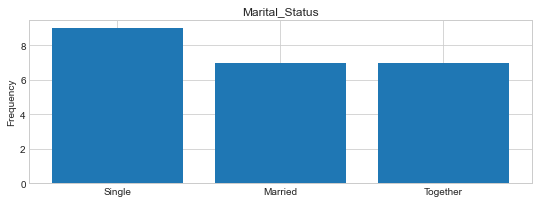

Income: 23
Single      9
Married     7
Together    7
Name: Marital_Status, dtype: int64


In [13]:
var = income_null["Marital_Status"]
    
# count number of categorical variable 
varValue = var.value_counts()
    
# visualize
plt.figure(figsize = (9, 3))
plt.bar(varValue.index, varValue)
plt.xticks(varValue.index, varValue.index.values)
plt.ylabel("Frequency")
plt.title("Marital_Status")
plt.show()
print("{}: {}\n{}".format("Income", len(income_null["Marital_Status"]), varValue))

* En çok single degeri var bu nedenle ortalama degerini single göre alırız.

In [14]:
data["Income"] = data["Income"].fillna(np.mean(data[data["Marital_Status"] == "Single"]["Income"]))

In [15]:
data[data["Income"].isnull()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response


<a id = "5"></a><b>
## Visualization

In [16]:
promotion = data[["NumDealsPurchases", "AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5", "Response"]]
product = data[["MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds", "Response"]]
place = data[["NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases", "NumWebVisitsMonth", "Response"]]

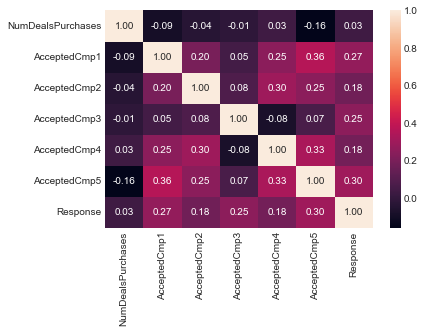

In [17]:
sns.heatmap(promotion.corr(), fmt = ".2f",annot = True)
plt.show()

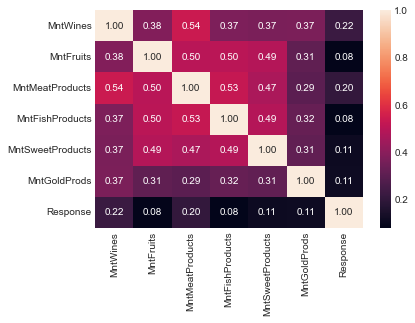

In [18]:
sns.heatmap(product.corr(), fmt = ".2f",annot = True)
plt.show()

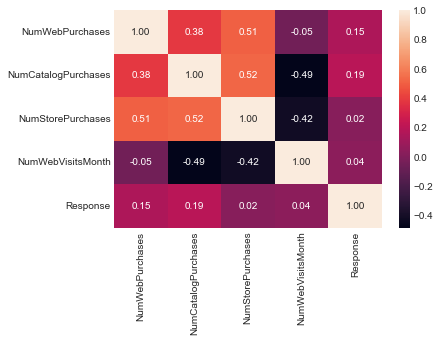

In [19]:
sns.heatmap(place.corr(), fmt = ".2f",annot = True)
plt.show()

<a id = "6"></a><b>
## Label Encoder

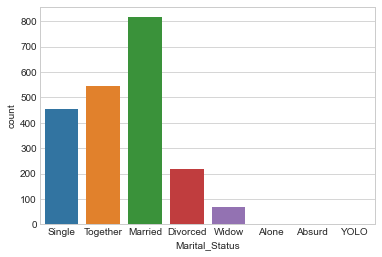

In [20]:
sns.countplot(x = "Marital_Status", data = data)
plt.show()

In [21]:
data["Marital_Status"] = [1 if m == "Married" else 2 if m == "Together" else 3 if m == "Single" else 4 if m == "Divorced" else 5 if m == "Widow" else 6 for m in data["Marital_Status"]]

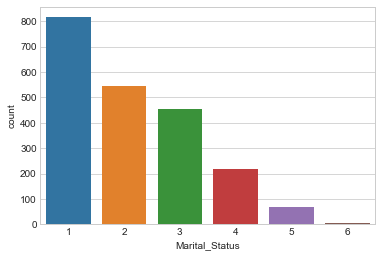

In [22]:
sns.countplot(x = "Marital_Status", data = data)
plt.show()

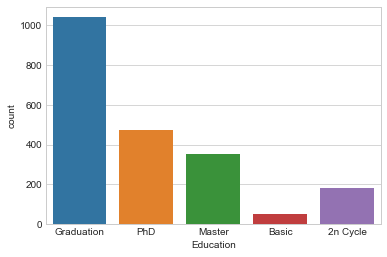

In [23]:
sns.countplot(x = "Education", data = data)
plt.show()

In [24]:
data["Education"] = [1 if e == "PhD" else 2 if e == "Master" else 3 if e == "Graduation" else 4 if e == "2n Cycle" else 5 for e in data["Education"]]
data["Education"].head()

0    3
1    3
2    3
3    1
4    2
Name: Education, dtype: int64

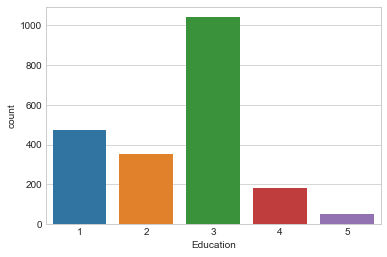

In [25]:
sns.countplot(x = "Education", data = data)
plt.show()

* 1. PhD
* 2. Master
* 3. Graduation
* 4. 2n Cycle
* 5. Basic

In [26]:
data["Education"] = [1 if e == "PhD" else 2 if e == "Master" else 3 if e == "Graduation" else 4 if e == "2n Cycle" else 5 for e in data["Education"]]

data = pd.get_dummies(data, columns = ["Education"])
data.head(10)

,ID,Year_Birth,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Education_5
0,2174,1954,3,46344.000000,1,1,08-03-2014,38,11,1,...,0,0,0,0,0,0,3,11,0,1
1,4141,1965,2,71613.000000,0,0,21-08-2013,26,426,49,...,0,0,0,0,0,0,3,11,0,1
2,6182,1984,2,26646.000000,1,0,10-02-2014,26,11,4,...,0,0,0,0,0,0,3,11,0,1
3,5324,1981,1,58293.000000,1,0,19-01-2014,94,173,43,...,0,0,0,0,0,0,3,11,0,1
4,7446,1967,2,62513.000000,0,1,09-09-2013,16,520,42,...,0,0,0,0,0,0,3,11,0,1
5,965,1971,4,55635.000000,0,1,13-11-2012,34,235,65,...,0,0,0,0,0,0,3,11,0,1
6,6177,1985,1,33454.000000,1,0,08-05-2013,32,76,10,...,0,0,0,0,0,0,3,11,0,1
7,4855,1974,2,30351.000000,1,0,06-06-2013,19,14,0,...,0,0,0,0,0,0,3,11,1,1
8,5899,1950,2,5648.000000,1,1,13-03-2014,68,28,0,...,1,0,0,0,0,0,3,11,0,1
9,1994,1983,1,49189.085586,1,0,15-11-2013,11,5,5,...,0,0,0,0,0,0,3,11,0,1


<a id = "7"></a><b>
## Drop ID and Dt_Customer

In [27]:
data.drop(["ID", "Dt_Customer"], axis = 1, inplace = True)
data.head()

,Year_Birth,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Education_5
0,1954,3,46344.0,1,1,38,11,1,6,2,...,0,0,0,0,0,0,3,11,0,1
1,1965,2,71613.0,0,0,26,426,49,127,111,...,0,0,0,0,0,0,3,11,0,1
2,1984,2,26646.0,1,0,26,11,4,20,10,...,0,0,0,0,0,0,3,11,0,1
3,1981,1,58293.0,1,0,94,173,43,118,46,...,0,0,0,0,0,0,3,11,0,1
4,1967,2,62513.0,0,1,16,520,42,98,0,...,0,0,0,0,0,0,3,11,0,1


<a id = "8"></a><b>
## Modeling

In [28]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [29]:
x = data.drop(columns = "Response", axis = 1)
y = data["Response"]

<a id = "9"></a><b>
## Train - Test - Split

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 42)

In [31]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg_head = logreg.predict(x_test)

acc_log_train = round(logreg.score(x_train, y_train) * 100,2)
acc_log_test = round(logreg.score(x_test, y_test) * 100,2)

print("Training Accuracy: % {}".format(acc_log_train))
print("Test Accuracy: % {}".format(acc_log_test))

Training Accuracy: % 86.15
Test Accuracy: % 86.89


<a id = "10"></a><b>
## Hyperparameter Tuning -- Grid Search -- Cross Validation

In [32]:
random_state = 42
classifier = [DecisionTreeClassifier(random_state = random_state),
             SVC(random_state = random_state),
             RandomForestClassifier(random_state = random_state),
             #LogisticRegression(random_state = random_state),
             KNeighborsClassifier()]

dt_param_grid = {"min_samples_split" : range(10,500,20),
                "max_depth": range(1,20,2)}

svc_param_grid = {"kernel" : ["rbf"],
                 "gamma": [0.001, 0.01, 0.1, 1],
                 "C": [1,10,50,100,200,300,1000]}

rf_param_grid = {"max_features": [1,3,10],
                "min_samples_split":[2,3,10],
                "min_samples_leaf":[1,3,10],
                "bootstrap":[False],
                "n_estimators":[100,300],
                "criterion":["gini"]}

logreg_param_grid = {"C":np.logspace(-3,3,7),
                    "penalty": ["l1","l2"]}

knn_param_grid = {"n_neighbors": np.linspace(1,19,10, dtype = int).tolist(),
                 "weights": ["uniform","distance"],
                 "metric":["euclidean","manhattan"]}

classifier_param = [dt_param_grid,
                   svc_param_grid,
                   rf_param_grid,
                   #logreg_param_grid,
                   knn_param_grid]

In [33]:
cv_result = []
best_estimators = []

for i in range(len(classifier)):
    clf = GridSearchCV(classifier[i], param_grid = classifier_param[i], cv = StratifiedKFold(n_splits = 10), scoring = "accuracy", n_jobs = -1,verbose = 1)
    clf.fit(x_train, y_train)
    cv_result.append(clf.best_score_)
    best_estimators.append(clf.best_estimator_)
    print(cv_result[i])

Fitting 10 folds for each of 250 candidates, totalling 2500 fits
0.8749746707193514
Fitting 10 folds for each of 28 candidates, totalling 280 fits
0.8664893617021276
Fitting 10 folds for each of 54 candidates, totalling 540 fits
0.8863677811550152
Fitting 10 folds for each of 40 candidates, totalling 400 fits
0.8686271529888551


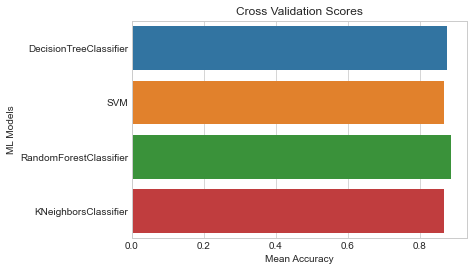

In [34]:
cv_results = pd.DataFrame({"Cross Validation Means":cv_result, "ML Models":["DecisionTreeClassifier", "SVM", "RandomForestClassifier",
              "KNeighborsClassifier"]})

g = sns.barplot("Cross Validation Means", "ML Models", data = cv_results)
g.set_xlabel("Mean Accuracy")
g.set_title("Cross Validation Scores")
plt.show()

* Decision Tree: 0.87 
* SVM: 0.86
* Random Forrest: 0.88
* KNeighbors: 0.86